In [2]:
import cv2
import torch.nn.functional as F
from datasets.burstsr_dataset import BurstSRDataset
import matplotlib.pyplot as plt
from utils.postprocessing_functions import BurstSRPostProcess
from utils.data_format_utils import convert_dict

In [3]:
def get_burst_rgb(burst, idx):
    # A simple baseline which upsamples the base image using bilinear upsampling
    burst_rgb = burst[:, idx, [0, 1, 3]]
    
    print(burst_rgb.max(), burst_rgb.mean())
    burst_rgb = burst_rgb.view(-1, *burst_rgb.shape[-3:])
    burst_rgb = F.interpolate(burst_rgb, scale_factor=8, mode='bilinear')
    return burst_rgb

def visualze_a_sample(subplot_idx, nrow, ncol, im, size):
    ax = fig.add_subplot(nrow, ncol, subplot_idx)
    ax.imshow(im)
    ax.set_title('GT_'+ str(size))
    ax.axis("off")

882
tensor(199, dtype=torch.int16) tensor(3, dtype=torch.int16)
tensor(195, dtype=torch.int16) tensor(3, dtype=torch.int16)
tensor(203, dtype=torch.int16) tensor(3, dtype=torch.int16)
tensor(199, dtype=torch.int16) tensor(3, dtype=torch.int16)
tensor(193, dtype=torch.int16) tensor(2, dtype=torch.int16)
tensor(201, dtype=torch.int16) tensor(2, dtype=torch.int16)
tensor(201, dtype=torch.int16) tensor(3, dtype=torch.int16)
tensor(199, dtype=torch.int16) tensor(3, dtype=torch.int16)
tensor(198, dtype=torch.int16) tensor(3, dtype=torch.int16)
tensor(200, dtype=torch.int16) tensor(3, dtype=torch.int16)
tensor(196, dtype=torch.int16) tensor(3, dtype=torch.int16)
tensor(202, dtype=torch.int16) tensor(3, dtype=torch.int16)
tensor(196, dtype=torch.int16) tensor(3, dtype=torch.int16)
tensor(198, dtype=torch.int16) tensor(3, dtype=torch.int16)
tensor(0.1945) tensor(0.0029)
tensor(0.1906) tensor(0.0029)
tensor(0.1984) tensor(0.0029)
tensor(0.1945) tensor(0.0029)
tensor(0.1887) tensor(0.0020)
tensor

/home/jongmin/BurstSR/utils/postprocessing_functions.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  im = im * torch.tensor(meta_info['cam_wb'])[[0, 1, -1]].view(3, 1, 1) / torch.tensor(meta_info['cam_wb'])[1]
/home/jongmin/anaconda3/envs/torch1.7/lib/python3.8/site-packages/torch/nn/functional.py:3454: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


tensor(0.0002, device='cuda:0') tensor(2.6647e-05, device='cuda:0')
tensor(0.0002, device='cuda:0') tensor(2.6858e-05, device='cuda:0')
tensor(0.0002, device='cuda:0') tensor(2.7493e-05, device='cuda:0')
tensor(0.0002, device='cuda:0') tensor(2.7454e-05, device='cuda:0')
tensor(0.0002, device='cuda:0') tensor(2.6815e-05, device='cuda:0')
tensor(0.0002, device='cuda:0') tensor(2.7035e-05, device='cuda:0')
tensor(0.0002, device='cuda:0') tensor(2.6864e-05, device='cuda:0')
tensor(0.0002, device='cuda:0') tensor(2.6743e-05, device='cuda:0')
tensor(0.0002, device='cuda:0') tensor(2.7622e-05, device='cuda:0')
tensor(0.0002, device='cuda:0') tensor(2.6833e-05, device='cuda:0')
tensor(0.0002, device='cuda:0') tensor(2.6781e-05, device='cuda:0')
tensor(0.0002, device='cuda:0') tensor(2.6623e-05, device='cuda:0')
tensor(0.0002, device='cuda:0') tensor(2.7083e-05, device='cuda:0')
tensor(0.0002, device='cuda:0') tensor(2.7304e-05, device='cuda:0')
burst :[1, 14, 4, 80, 80] GT : [1, 3, 640, 640]


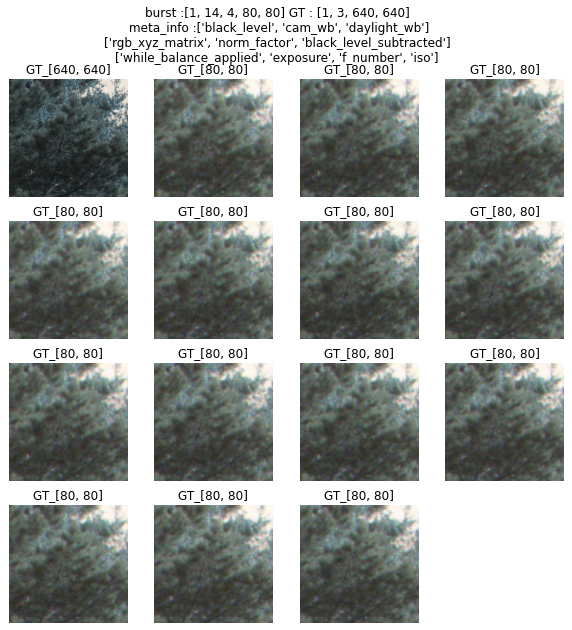

In [6]:
PATH_TO_BURSTSR = '.'
device = 'cuda'
# Load dataset
dataset = BurstSRDataset(root=PATH_TO_BURSTSR,
                         split='val', burst_size=14, crop_sz=80, random_flip=False)

# Postprocessing function to obtain sRGB images
postprocess_fn = BurstSRPostProcess(return_np=True)

print(len(dataset))

nrow = 4; ncol = 4;

for idx in range(len(dataset)):
    ## Load the data
    burst, frame_gt, meta_info_burst, meta_info_gt = dataset[idx]
    burst = burst.unsqueeze(0).to(device)
    frame_gt = frame_gt.unsqueeze(0).to(device)
#     print(burst.shape, frame_gt.shape, meta_info_gt.keys())
    
    ## Generate plotting
    fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(10,10))
    
    for r in range(nrow):
        for c in range(ncol):
            axs[r,c].axis('off')  
    
    # Apply simple post-processing to obtain RGB images    
    gt_0 = postprocess_fn.process(frame_gt[0].cpu(), meta_info_gt)
    gt_0 = cv2.cvtColor(gt_0, cv2.COLOR_RGB2BGR)
    visualze_a_sample(1, nrow, ncol, gt_0, list(frame_gt.shape[-2:]))
    
    for burst_idx in range(burst.shape[1]):
        burst_rgb = get_burst_rgb(burst, burst_idx)
        # Apply simple post-processing to obtain RGB images
        pred_0 = postprocess_fn.process(burst_rgb[0].cpu(), meta_info_gt)
        pred_0 = cv2.cvtColor(pred_0, cv2.COLOR_RGB2BGR)
        visualze_a_sample(2+burst_idx, nrow, ncol, pred_0, list(burst[0, burst_idx].shape[-2:]))
    
    txt = 'burst :'+ str(list(burst.shape)) + ' GT : ' + str(list(frame_gt.shape)) + '\n meta_info :' + str(list(meta_info_gt.keys())[:3]) + '\n' + str(list(meta_info_gt.keys())[3:6]) + '\n' + str(list(meta_info_gt.keys())[6:])
    print(txt)
    print(meta_info_gt)
    print(meta_info_burst)
    plt.suptitle(txt)
#     plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
#     plt.figtext(0.5, -0.03, txt, wrap=True, horizontalalignment='center', fontsize=12)

#     plt.tight_layout()
    plt.show()
    break
#     plt.savefig('vis/' +str(idx) +'.png', dpi=200, bbox_inches = "tight")

# for idx in range(len(dataset)):
#     ## Load the data
#     burst, frame_gt, meta_info_burst, meta_info_gt = dataset[idx]
#     burst = burst.unsqueeze(0).to(device)
#     frame_gt = frame_gt.unsqueeze(0).to(device)
# #     print(burst.shape, frame_gt.shape, meta_info_gt.keys())
    
#     ## Generate plotting
#     fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(10,10))
    
#     for r in range(nrow):
#         for c in range(ncol):
#             axs[r,c].axis('off')  
    
#     # Apply simple post-processing to obtain RGB images    
#     gt_0 = postprocess_fn.process(frame_gt[0].cpu(), meta_info_gt)
#     gt_0 = cv2.cvtColor(gt_0, cv2.COLOR_RGB2BGR)
#     visualze_a_sample(1, nrow, ncol, gt_0, list(frame_gt.shape[-2:]))
    
#     for burst_idx in range(burst.shape[1]):
#         burst_rgb = get_burst_rgb(burst , burst_idx)
#         # Apply simple post-processing to obtain RGB images
#         pred_0 = postprocess_fn.process(burst_rgb[0].cpu(), meta_info_gt)
#         pred_0 = cv2.cvtColor(pred_0, cv2.COLOR_RGB2BGR)
#         visualze_a_sample(2+burst_idx, nrow, ncol, pred_0, list(burst[0, burst_idx].shape[-2:]))
    
#     txt = 'burst :'+ str(list(burst.shape)) + ' GT : ' + str(list(frame_gt.shape)) + '\n meta_info :' + str(list(meta_info_gt.keys())[:3]) + '\n' + str(list(meta_info_gt.keys())[3:6]) + '\n' + str(list(meta_info_gt.keys())[6:])
#     plt.suptitle(txt)
# #     plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
# #     plt.figtext(0.5, -0.03, txt, wrap=True, horizontalalignment='center', fontsize=12)

# #     plt.tight_layout()
#     plt.show()
#     break